In [1]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

import timeit

In [2]:
BatchSize = 32

trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=transforms.Compose([
                       transforms.Resize((28, 28)),
                       transforms.ToTensor()]))
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) 

testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=transforms.Compose([
                       transforms.Resize((28, 28)),
                       transforms.ToTensor()]))
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) 

In [3]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000


In [4]:
throughput=[]
use_gpu = torch.cuda.is_available()

if use_gpu:
    print('GPU is avaialble!')
    
else :
    print("Not Available")

GPU is avaialble!


In [5]:
class MLP(nn.Module):   # nn.Module --> Base class for all NN modules
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x
    
net=MLP()
print(net)
net=net.cuda()
net=net.double()

MLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [6]:


start1 = timeit.default_timer()

for i,data in enumerate(trainLoader):
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda() 
    inputs=inputs.view(inputs.shape[0],-1)
    outputs = net(inputs.double())       #FLOAT_64
        # Predicted class is the one with maximum probability
    preds = torch.argmax(outputs,dim=1)

    
stop1 = timeit.default_timer()

throughput.append(BatchSize/(stop1-start1))


In [7]:
class MLP(nn.Module):   # nn.Module --> Base class for all NN modules
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x
    
net=MLP()

net=net.cuda()
net=net.float()
print(net)

MLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [9]:
start2 = timeit.default_timer()

for i,data in enumerate(trainLoader):
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    outputs = net(inputs.float())       #FLOAT_32
        # Predicted class is the one with maximum probability
    preds = torch.argmax(outputs,dim=1)

    
stop2 = timeit.default_timer()

throughput.append(BatchSize/(stop2-start2))

In [10]:
class MLP(nn.Module):   # nn.Module --> Base class for all NN modules
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784,100)
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x
    
net=MLP()
print(net)
net=net.cuda()
net=net.half()

MLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [11]:
start3 = timeit.default_timer()

for i,data in enumerate(trainLoader):
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    inputs=inputs.view(inputs.shape[0],-1)
    outputs = net(inputs.half())       #FLOAT_16
        # Predicted class is the one with maximum probability
    preds = torch.argmax(outputs,dim=1)

    
stop3 = timeit.default_timer()

throughput.append(BatchSize/(stop3-start3))

In [12]:
throughput

[6.638978943295713, 7.457781440998589, 7.262451563987096]

([<matplotlib.axis.XTick at 0x2638e9b8ba8>,
 <a list of 3 Text xticklabel objects>)

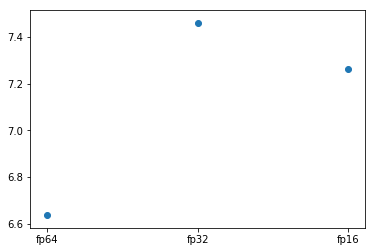

In [13]:
x = np.arange(3)
plt.scatter(x,throughput)
plt.xticks(x, ['fp64','fp32','fp16'])
